##### Question Section
Questions to study ->
Can I do half the data under one model and the remaining half of the data under another model and then ensemble the data?

For example, Age will be a U-curve, so using polynomial modelling for it is accurate, 
where as, we have seen fare to be linear, so using MLR for linear 
and using Random forest for Categorical. This would yield best results?? What kind of limitations does this idea have ?

## Steps :

1. Select relevent columns
1. Make Dummy Variables (OHE)
1. train validation split (since we already have test set)
1. Modelling
1. Tune model using GridsearchCV
1. Test ensambles

Select from the following Models:
1. decision trees
1. Naive Bayers
1. Linear Discriminant Analysis
1. K-nearest Neighbour
1. Logistic Regression
1. Neural Networks 
1. Support Vector Machin



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Importing Clean Data

In [86]:
train_set = pd.read_csv("train_clean.csv")
test_set =  pd.read_csv("test_clean.csv")

#### 1. Selecting Relevent Columns

In [87]:
train = train_set.drop(['PassengerId','Unnamed: 0','Name','Ticket','Ticket_num','Age','Fare'],axis=1)
test = test_set.drop(['PassengerId','Unnamed: 0','Name','Ticket','Ticket_num','Age','Fare'],axis=1)

In [4]:
print(train.shape)
train.head()

(891, 10)


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Ticket_prefix,Age_binned,Fare_binned
0,0,3,male,1,0,0,S,A,19-27,1-10
1,1,1,female,1,0,1,C,P,37-45,71-80
2,1,3,female,0,0,0,S,S,19-27,1-10
3,1,1,female,1,0,1,S,None,28-36,51-60
4,0,3,male,0,0,0,S,None,28-36,1-10


In [5]:
print(test.shape)
test.head()

(418, 9)


,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Ticket_prefix,Age_binned,Fare_binned
0,3,male,0,0,1,S,None,28-36,1-10
1,3,female,1,0,1,C,None,46-54,1-10
2,2,male,0,0,1,S,None,55-63,1-10
3,3,male,0,0,1,S,None,19-27,1-10
4,3,female,1,1,1,S,None,19-27,11-20


#### 2. Making Dummy Variables /OHE

See if I leave p class as labels of 1,2,3 the prediction will get be weight by the number that is meant for class representation.
[AAh! This is called natural ordered relationships. Explained in the medium article below] 

Things I wanna do 
1. One Hot: Passenger Class 
1. One Hot: Sex
1. One Hot: Spouse and sibling 
1. One Hot: Parent and Child
1. One Hot: Embarkment
1. Cabin detail (Present/Absent)
1. Embarked
1. Ticket classification based on pre text
1. Fare Binning ?
1. Age Binning ? (5 width)

Thing I need to read on is label encoding vs one hot encoding impact on category prediction ML model.
<a href='https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179'>A good Medium Article on this.</a>


In [6]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked',
       'Ticket_prefix', 'Age_binned', 'Fare_binned'],
      dtype='object')

In [7]:
train_dum = pd.get_dummies(train)
test_dum = pd.get_dummies(test)

#### 3. Train - Validation Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = train_dum.drop(['Survived'],axis=1)
y = train_dum['Survived'].values

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=np.random)

#### 4. Modelling

In [16]:
from sklearn import metrics

__Decision Tree Classifier__

In [17]:
from sklearn.tree import DecisionTreeClassifier

depths=10
mean_acc=np.zeros((depths))

for i in range(1,depths+1):
    TitanicTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    TitanicTree.fit(X_train,y_train)

    yhat = TitanicTree.predict(X_valid)
    mean_acc[i-1] = metrics.accuracy_score(y_valid, yhat)

mean_acc

array([0.82681564, 0.82681564, 0.8547486 , 0.8547486 , 0.83798883,
       0.84357542, 0.8603352 , 0.82122905, 0.82681564, 0.81564246])

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8603351955307262 with k= 7


In [19]:
TitanicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

__KNN - Classifier__

In [20]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 1 #Kstart
Ke = 15 #Kstop
mean_acc = np.zeros((Ke-Ks+1))

for n in range(Ks,Ke+1):
      
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN.predict(X_valid)
    mean_acc[n-1] = metrics.accuracy_score(y_valid, yhat)

mean_acc

array([0.72067039, 0.81564246, 0.74860335, 0.83240223, 0.77094972,
       0.86592179, 0.8547486 , 0.8603352 , 0.84916201, 0.8603352 ,
       0.84916201, 0.84916201, 0.83798883, 0.86592179, 0.8603352 ])

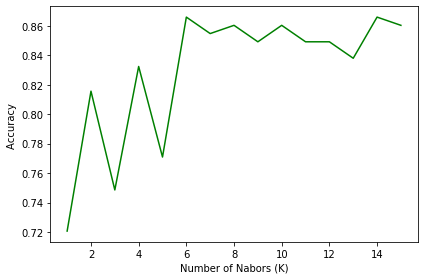

In [21]:
plt.plot(range(Ks,Ke+1),mean_acc,'g')
# plt.fill_between(range(1,Ks+1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8659217877094972 with k= 6


Highest accuracy for 6 Neighbours

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)

__Logistic Regression__


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_valid)
yhat_prob = LR.predict_proba(X_valid)

jaccard_similarity_score(y_valid, yhat)

C:\Users\samla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8491620111731844

In [24]:
from sklearn.metrics import log_loss
log_loss(y_valid, yhat_prob)

0.4745482069012868

In [25]:
from sklearn.metrics import f1_score
f1_score(y_valid, yhat, average='weighted') 

0.8430440162283739

__Support Vector Machines__

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf').fit(X_train, y_train) 

In [27]:
yhat = clf.predict(X_valid)

In [28]:
from sklearn.metrics import f1_score
f1_score(y_valid, yhat, average='weighted') 

0.8723911993930616

In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_valid, yhat)

C:\Users\samla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8715083798882681

In [30]:
metrics.accuracy_score(y_valid,yhat)

0.8715083798882681

__Random Forest Classifier__

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
yhat = rf.predict(X_valid)

In [33]:
metrics.accuracy_score(y_valid, yhat)

0.8603351955307262

#### 5. Comparing RMSE of each model using "train" data

In [51]:
from sklearn.model_selection import cross_val_score
model_accuracy={'accuracy_training':{},'accuracy_valid':{}}
models = [TitanicTree,KNN,LR,clf,rf]

In [52]:
TitanicTree.fit(X_train,y_train)
yhat = TitanicTree.predict(X_valid)
model_accuracy['accuracy_training']['DecisionTree']=cross_val_score(TitanicTree,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['DecisionTree']=metrics.accuracy_score(y_valid, yhat)

In [53]:
KNN.fit(X_train,y_train)
yhat = KNN.predict(X_valid)
model_accuracy['accuracy_training']['KNN']=cross_val_score(KNN,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['KNN']=metrics.accuracy_score(y_valid, yhat)

In [54]:
LR.fit(X_train,y_train)
yhat = LR.predict(X_valid)
model_accuracy['accuracy_training']['Logistic R']=cross_val_score(LR,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['Logistic R']=metrics.accuracy_score(y_valid, yhat)

In [55]:
clf.fit(X_train,y_train)
yhat = clf.predict(X_valid)
model_accuracy['accuracy_training']['Support Vector M']=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['Support Vector M']=metrics.accuracy_score(y_valid, yhat)

In [56]:
rf.fit(X_train,y_train)
yhat = rf.predict(X_valid)
model_accuracy['accuracy_training']['Random Forest']=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['Random Forest']=metrics.accuracy_score(y_valid, yhat)

In [57]:
pd.DataFrame(model_accuracy)

,accuracy_training,accuracy_valid
DecisionTree,0.782360,0.860335
KNN,0.769644,0.860335
Logistic R,0.769664,0.849162
Support Vector M,0.814636,0.871508
Random Forest,0.792180,0.849162


#### 6. Paramter Tuning 

In [69]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_valid) 
print(classification_report(y_valid, predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       123
           1       0.78      0.82      0.80        56

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



In [70]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}  
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.592, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.754, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.866, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.601, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [74]:
print(grid.best_params_,"\n") 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [75]:
grid_predictions = grid.predict(X_valid) 
print(classification_report(y_valid, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       123
           1       0.78      0.82      0.80        56

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.87      0.87       179



## Finally

Finally adding it to the test set

In [78]:
prediction_final = grid.predict(test_dum)

In [82]:
prediction_final

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
test_set['Survived'] = prediction_final

In [99]:
solution = test_set[['PassengerId','Survived']].set_index('PassengerId')

In [100]:
solution

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [101]:
solution.to_csv("Kaggle Submission.csv")

In [93]:
sample_submissions = pd.read_csv('Titanic Kaggle Data/gender_submission.csv')

In [94]:
sample_submissions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


a score of 0.7 in this competition indicates you predicted Titanic survival correctly for 70% of people.

so I need to reduce my false positives